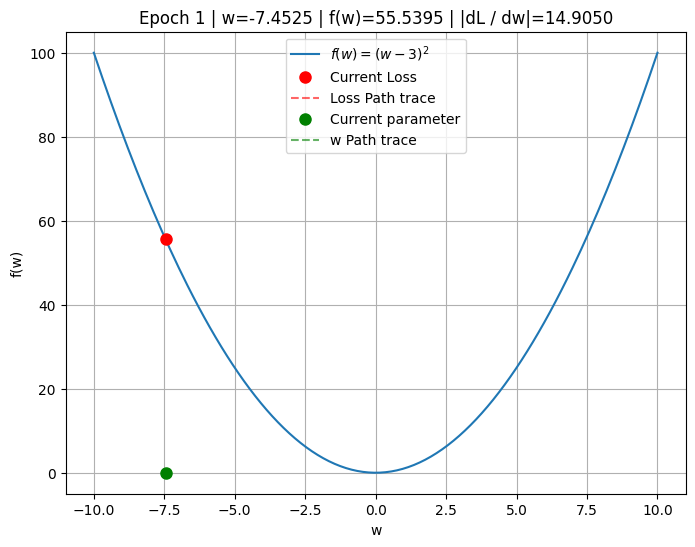

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient
def f(w):
    return (w)**2

def grad_f(w):
    return 2 * (w)

# Gradient descent parameters
lr = 0.1
epochs = 100
w = np.random.uniform(-10, -9)  # random initial value

# Prepare for plotting
w_range = np.linspace(-10, 10, 200)
f_values = f(w_range)

plt.ion()  # interactive mode
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the parabola once
ax.plot(w_range, f_values, label=r"$f(w) = (w-3)^2$")
point, = ax.plot([], [], 'ro', markersize=8, label="Current Loss")
path_line, = ax.plot([], [], 'r--', alpha=0.6, label="Loss Path trace")

pointw, = ax.plot([], [], 'go', markersize=8, label="Current parameter")
path_linew, = ax.plot([], [], 'g--', alpha=0.6, label="w Path trace")


ax.set_xlabel("w")
ax.set_ylabel("f(w)")
ax.legend()
ax.grid(True)

# Storage for path
path_w, path_f, path_fw = [], [], []

# Gradient descent loop
for epoch in range(epochs):
    # Update parameter
    w = w - lr * grad_f(w)

    # Plotting function

    # Store path
    path_w.append(w)
    path_f.append(f(w))
    path_fw.append(0)

    # Update trace and current point
    point.set_data([w], [f(w)])
    path_line.set_data(path_w, path_f)

    pointw.set_data([w], [0])
    path_linew.set_data(path_w, path_fw)

    ax.set_title(f"Epoch {epoch+1} | w={w:.4f} | f(w)={f(w):.4f} | |dL / dw|={np.abs(grad_f(w)):.4f}")
    plt.pause(1)

plt.ioff()
plt.show()

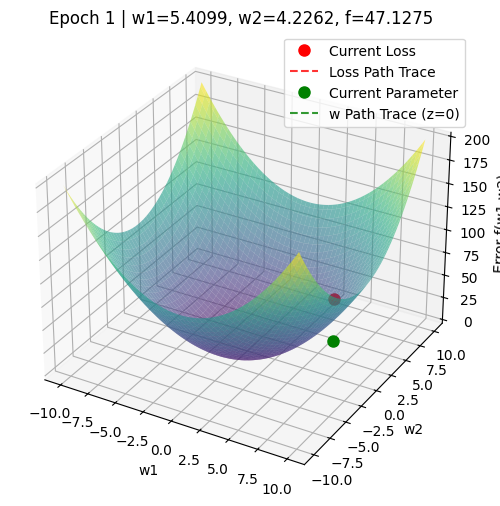

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient for 2D parabola
def f(w1, w2):
    return w1**2 + w2**2

def grad_f(w1, w2):
    return np.array([2 * w1, 2 * w2])

# Gradient descent parameters
lr = 0.1
epochs = 50
w = np.random.uniform(5, 10, size=2)  # random initial (w1, w2)

# Prepare surface for plotting
w1_range = np.linspace(-10, 10, 100)
w2_range = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
F_values = f(W1, W2)

plt.ion()
fig = plt.figure(figsize=(8, 6))

# 3D surface plot
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, F_values, cmap='viridis', alpha=0.6)

# Traces and points
point_err, = ax.plot([], [], [], 'ro', markersize=8, label="Current Loss")
path_err, = ax.plot([], [], [], 'r--', alpha=0.8, label="Loss Path Trace")

point_w, = ax.plot([], [], [], 'go', markersize=8, label="Current Parameter")
path_w_line, = ax.plot([], [], [], 'g--', alpha=0.8, label="w Path Trace (z=0)")

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Error f(w1,w2)")
ax.set_title("Gradient Descent on 3D Parabola")
ax.legend()

# Storage for path
path_w1, path_w2, path_f = [], [], []

# Gradient descent loop
for epoch in range(epochs):
    grad = grad_f(w[0], w[1])
    w = w - lr * grad

    # Store path
    path_w1.append(w[0])
    path_w2.append(w[1])
    path_f.append(f(w[0], w[1]))

    # Error path updates
    point_err.set_data([w[0]], [w[1]])
    point_err.set_3d_properties([f(w[0], w[1])])
    path_err.set_data(path_w1, path_w2)
    path_err.set_3d_properties(path_f)

    # Parameter path at z=0
    point_w.set_data([w[0]], [w[1]])
    point_w.set_3d_properties([0])
    path_w_line.set_data(path_w1, path_w2)
    path_w_line.set_3d_properties(np.zeros(len(path_w1)))

    ax.set_title(f"Epoch {epoch+1} | w1={w[0]:.4f}, w2={w[1]:.4f}, f={f(w[0], w[1]):.4f}")

    plt.pause(5)

plt.ioff()
plt.show()